In [3]:
function f(x,y)
    return x^2+y^2
end

f (generic function with 1 method)

In [4]:
function Flatt(N)
    F=0
    for ix=0:N-1
        x=ix/N
        for iy=0:N-1
            y=iy/N
            F+=(f(ix/N,iy/N)+f((ix+1)/N,iy/N)+f(ix/N,(iy+1)/N)+f((ix+1)/N,(iy+1)/N))/4
        end
    end
    F/=N^2
    return F
end

Flatt (generic function with 1 method)

In [5]:
function Fmc(N)
    F=0
    for ix=1:N^2
        x=rand()
        y=rand()
        F+=f(x,y)
    end
    F/=N^2
    return F
end

Fmc (generic function with 1 method)

In [6]:
using Plots

In [7]:
Ns=[N for N in 1:1000]

1000-element Vector{Int64}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
    ⋮
  992
  993
  994
  995
  996
  997
  998
  999
 1000

In [8]:
deltalatt = [(Flatt(N)-2/3)/(2/3) for N in Ns]

1000-element Vector{Float64}:
 0.5000000000000001
 0.12500000000000006
 0.055555555555555636
 0.031250000000000056
 0.02000000000000013
 0.013888888888889117
 0.010204081632652906
 0.007812500000000056
 0.0061728395061731445
 0.0050000000000001155
 ⋮
 5.080970166271292e-7
 5.070741944668278e-7
 5.060544326918048e-7
 5.050377392956662e-7
 5.040241474185692e-7
 5.03013589614465e-7
 5.020060214189215e-7
 5.010014844653021e-7
 5.000000370403157e-7

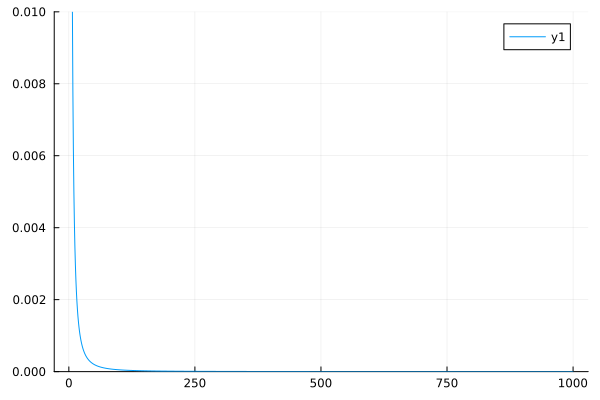

In [10]:
plot(Ns,deltalatt,ylim=(0,0.01))

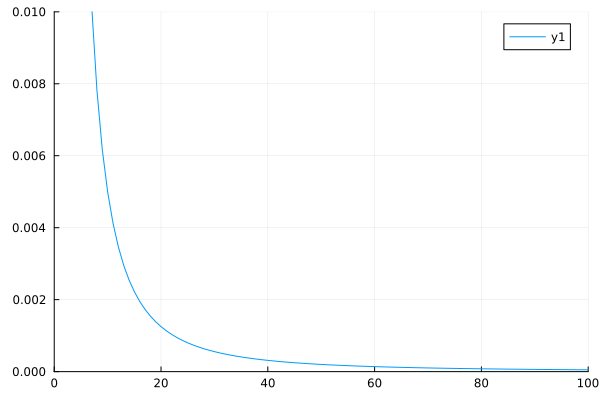

In [11]:
plot(Ns,deltalatt,xlim=(0,100),ylim=(0,0.01))

In [8]:
Ns=[N for N in 100:1000]
deltamc=[(Fmc(N)-2/3)/(2/3) for N in Ns]

901-element Vector{Float64}:
  0.0017946126702946263
 -0.0008775747759190433
  0.0056103032873954795
  0.002939600003083187
  0.004297364049994423
 -0.006068942197626104
 -0.006068343981364244
  0.0014944829644639168
  0.002970186208976544
 -0.007956345717603674
  ⋮
  0.0008567858256296468
  0.0006437908614352894
  0.00024295316171407677
  5.394718944196075e-5
  0.00020285712919854149
 -0.0016590285619124123
  0.00017030062232614718
  0.00026395626340408596
 -0.0008119738912059637

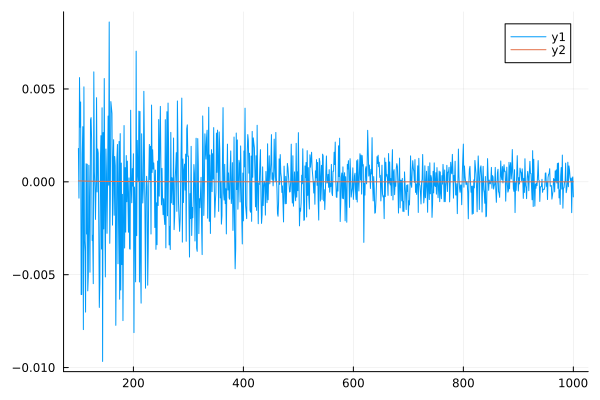

In [9]:
plot(Ns,deltamc)
plot!(Ns,deltalatt)

In [10]:
function sigma(N,M)
    F2=0
    F1=0
    for iM=1:M
        F=Fmc(N)
        F2+=F^2
        F1+=F
    end
    F2/=M
    F1/=M
    return sqrt(F2-F1^2)
end

sigma (generic function with 1 method)

In [12]:
Nmcs = [i for i in 1:1000]
sigmas = [sigma(i,100) for i in Nmcs]

1000-element Vector{Float64}:
 0.42521763902488885
 0.2051336381623501
 0.13705287613862502
 0.09062334150269753
 0.07954215225294296
 0.07031212572837853
 0.06761567013323286
 0.04905679061987055
 0.04779164209231363
 0.04334749253962522
 ⋮
 0.00043157309422001654
 0.0004289483240230252
 0.00043441135956718906
 0.00041809538389036036
 0.0004634798152874067
 0.00039939596434282037
 0.0003961907600623405
 0.0004299846885639975
 0.0004046144629823109

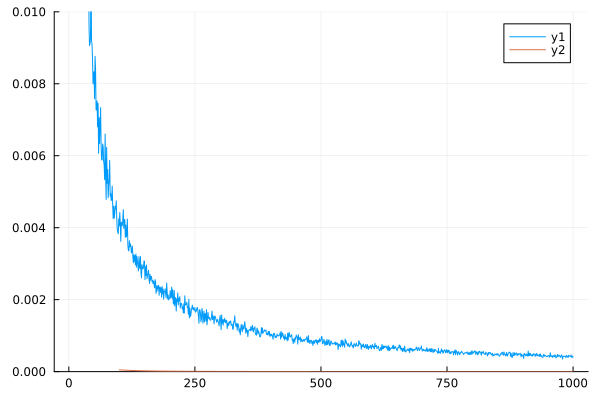

In [14]:
plot(Nmcs,sigmas,ylim=(0,0.01))
plot!(Ns,deltalatt,ylim=(0,0.01))